# Machine Learning Challenge

## Overview

The focus of this exercise is on a field within machine learning called [Natural Language Processing](https://en.wikipedia.org/wiki/Natural-language_processing). We can think of this field as the intersection between language, and machine learning. Tasks in this field include automatic translation (Google translate), intelligent personal assistants (Siri), information extraction, and speech recognition for example.

NLP uses many of the same techniques as traditional data science, but also features a number of specialised skills and approaches. There is no expectation that you have any experience with NLP, however, to complete the challenge it will be useful to have the following skills:

- understanding of the python programming language
- understanding of basic machine learning concepts, i.e. supervised learning


### Instructions

1. Download this notebook!
2. Answer each of the provided questions, including your source code as cells in this notebook.
3. Share the results with us, e.g. a Github repo.

### Task description

You will be performing a task known as [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). Here, the goal is to predict sentiment -- the emotional intent behind a statement -- from text. For example, the sentence: "*This movie was terrible!"* has a negative sentiment, whereas "*loved this cinematic masterpiece*" has a positive sentiment.

To simplify the task, we consider sentiment binary: labels of `1` indicate a sentence has a positive sentiment, and labels of `0` indicate that the sentence has a negative sentiment.

### Dataset

The dataset is split across three files, representing three different sources -- Amazon, Yelp and IMDB. Your task is to build a sentiment analysis model using both the Yelp and IMDB data as your training-set, and test the performance of your model on the Amazon data.

Each file can be found in the `input` directory, and contains 1000 rows of data. Each row contains a sentence, a `tab` character and then a label -- `0` or `1`. 

**Notes**
- Feel free to use existing machine learning libraries as components in you solution!
- Suggested libraries: `sklearn` (for machine learning), `pandas` (for loading/processing data), `spacy` (for text processing).
- As mentioned, you are not expected to have previous experience with this exact task. You are free to refer to external tutorials/resources to assist you. However, you will be asked to justfify the choices you have made -- so make you understand the approach you have taken.

In [1]:
import os
print(os.listdir("./input"))

['yelp_labelled.txt', 'imdb_labelled.txt', 'amazon_cells_labelled.txt', '.ipynb_checkpoints']


In [2]:
!head "./input/amazon_cells_labelled.txt"

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0


## Classical ML way (tfidf)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import re

In [20]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=10)
sp = spacy.load('en_core_web_sm')

In [16]:
train_files = ['./input/yelp_labelled.txt', './input/imdb_labelled.txt']
test_files = ['./input/amazon_cells_labelled.txt']

def get_data(files):
    data = []
    for file in files:
        with open(file, 'r') as f:
            data += [line.strip() for line in f]
    
    # split into x and y
    data = [l.split('\t') for l in data]
    x = [l[0].replace(r'\s+', ' ') for l in data]
    y = [int(l[1]) for l in data]
    
    # lemmatise using spacy
    x = [sp(sentence) for sentence in x]
    x = [[word.lemma_ for word in sentence] for sentence in x]
    x = [' '.join(words) for words in x]
    return x, y

trainX, trainY = get_data(train_files)
testX, testY = get_data(test_files)

In [17]:
trainX[:5]

['wow ... love this place .',
 'crust be not good .',
 'not tasty and the texture be just nasty .',
 'stop by during the late May bank holiday off Rick Steve recommendation and love -PRON- .',
 'the selection on the menu be great and so be the price .']

In [31]:
trainX_tfidf = vectorizer.fit_transform(trainX)
testX_tfidf = vectorizer.transform(testX)

In [32]:
vectorizer.get_feature_names()[:10]

['10',
 'absolutely',
 'act',
 'acting',
 'actor',
 'actually',
 'amazing',
 'art',
 'ask',
 'atmosphere']

In [26]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, LSTM, Embedding, Reshape

Using TensorFlow backend.


In [28]:
model = Sequential()
model.add(Dense(1, input_dim=trainX2.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 196       
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [33]:
bs = 256
epochs = 10
model.fit(trainX_tfidf, trainY, batch_size=bs, epochs=epochs)

Epoch 1/10
2000/2000 [==============================] - 0s 15us/step - loss: 0.6762 - accuracy: 0.6475
Epoch 2/10
2000/2000 [==============================] - 0s 17us/step - loss: 0.6753 - accuracy: 0.6505
Epoch 3/10
2000/2000 [==============================] - 0s 15us/step - loss: 0.6743 - accuracy: 0.6545
Epoch 4/10
2000/2000 [==============================] - 0s 16us/step - loss: 0.6733 - accuracy: 0.6600
Epoch 5/10
2000/2000 [==============================] - 0s 15us/step - loss: 0.6723 - accuracy: 0.6655
Epoch 6/10
2000/2000 [==============================] - 0s 19us/step - loss: 0.6714 - accuracy: 0.6715
Epoch 7/10
2000/2000 [==============================] - 0s 19us/step - loss: 0.6704 - accuracy: 0.6755
Epoch 8/10
2000/2000 [==============================] - 0s 18us/step - loss: 0.6694 - accuracy: 0.6815
Epoch 9/10
2000/2000 [==============================] - 0s 18us/step - loss: 0.6684 - accuracy: 0.6885
Epoch 10/10
2000/2000 [==============================] - 0s 18us/step - l

In [34]:
model.evaluate(testX_tfidf, testY)

1000/1000 [==============================] - 0s 156us/step


[0.6720288472175598, 0.6539999842643738]

In [36]:
model = Sequential()
model.add(Dense(input_dim=trainX2.shape[1], units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                1960      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 2,191
Trainable params: 2,191
Non-trainable params: 0
_________________________________________________________________


In [37]:
bs = 256
epochs = 10
model.fit(trainX_tfidf, trainY, batch_size=bs, epochs=epochs)

Epoch 1/10
2000/2000 [==============================] - 1s 642us/step - loss: 0.6942 - accuracy: 0.4970
Epoch 2/10
2000/2000 [==============================] - 0s 27us/step - loss: 0.6923 - accuracy: 0.5095
Epoch 3/10
2000/2000 [==============================] - 0s 23us/step - loss: 0.6909 - accuracy: 0.5395
Epoch 4/10
2000/2000 [==============================] - 0s 23us/step - loss: 0.6894 - accuracy: 0.5725
Epoch 5/10
2000/2000 [==============================] - 0s 23us/step - loss: 0.6876 - accuracy: 0.5930
Epoch 6/10
2000/2000 [==============================] - 0s 32us/step - loss: 0.6854 - accuracy: 0.5990
Epoch 7/10
2000/2000 [==============================] - 0s 28us/step - loss: 0.6822 - accuracy: 0.6165
Epoch 8/10
2000/2000 [==============================] - 0s 26us/step - loss: 0.6784 - accuracy: 0.6275
Epoch 9/10
2000/2000 [==============================] - 0s 25us/step - loss: 0.6731 - accuracy: 0.6465
Epoch 10/10
2000/2000 [==============================] - 0s 26us/step - 

In [38]:
model.evaluate(testX_tfidf, testY)

1000/1000 [==============================] - 0s 194us/step


[0.6714731330871582, 0.6119999885559082]

## Fastai way
As can be seen the results above are less than impressive, even with a deeper model. Hence we use transfer learning (Ulmfit).

In [41]:
# save data to pandas dataframe
import pandas as pd

def get_data(files):
    data = []
    for file in files:
        with open(file, 'r') as f:
            data += [line.strip() for line in f]
    
    # split into x and y
    data = [l.split('\t') for l in data]
    x = [l[0] for l in data]
    y = [int(l[1]) for l in data]
    
    df = pd.DataFrame({'label': y, 'text': x})
    return df

train = get_data(train_files)
test = get_data(test_files)

In [42]:
train.head()

,label,text
0,1,Wow... Loved this place.
1,0,Crust is not good.
2,0,Not tasty and the texture was just nasty.
3,1,Stopped by during the late May bank holiday of...
4,1,The selection on the menu was great and so wer...


In [45]:
from fastai.text import * 
from sklearn.model_selection import train_test_split

In [47]:
train_df, valid_df = train_test_split(train, test_size=0.2)
print(train_df.shape, valid_df.shape)

(1600, 2) (400, 2)


In [50]:
!mkdir ./lm_models
path = './lm_models' # somewhere to save models and temporary files
# Language model data
data_lm = TextLMDataBunch.from_df(path, train_df, valid_df, 
                                  text_cols='text', label_cols='label')
# Classifier model data
data_clas = TextClasDataBunch.from_df(path, train_df, valid_df, 
                                      text_cols='text', label_cols='label', 
                                      vocab=data_lm.train_ds.vocab, bs=32)

### Train a language model for corpus
We fine tune the ulmfit model to predict the next word. This is done before the classification task to understand how language is used in reviews. Model was initially trained on wikipedia text.

In [56]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
# learn.summary()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


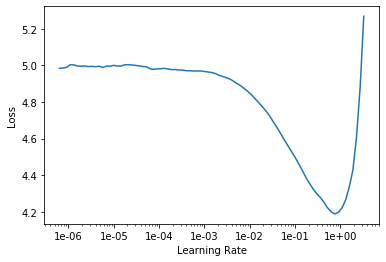

In [57]:
learn.lr_find()
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(1, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.475096,3.660277,0.225223,00:20


In [59]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.487131,3.335037,0.341629,00:38


In [63]:
valid_df.text.iloc[1]

'It is an hour and half waste of time, following a bunch of very pretty high schoolers whine and cry about life.  '

In [64]:
learn.predict('It is an hour and half waste', n_words=10)

"It is an hour and half waste of time ; many parents and parents 's work is"

In [65]:
learn.save_encoder('lang_model')

## Train classification model

In [66]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('lang_model')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1600 items)
x: TextList
xxbos xxmaj the servers went back and forth several times , not even so much as an " xxmaj are you being helped ? ",xxbos xxmaj the last 3 times i had lunch here has been bad .,xxbos xxmaj there is nothing xxunk about working / eating there .,xxbos xxmaj xxunk , the film fails on most xxunk .,xxbos xxmaj when xxmaj xxunk and xxmaj xxunk beautifully xxunk a duet from " xxmaj xxunk xxmaj xxunk " that perfectly xxunk their situation in the movie , you appreciate the subtle xxunk of this excellent film .
y: CategoryList
0,0,0,0,1
Path: lm_models;

Valid: LabelList (400 items)
x: TextList
xxbos xxmaj the service was terrible though .,xxbos xxmaj it is an hour and half waste of time , xxunk a bunch of very pretty high xxunk xxunk and xxunk about life .,xxbos xxmaj however , there was so much xxunk in the xxunk , it was barely edible .,xxbos xxmaj do n't bother coming here .,xxbos a mature , subtle script that xxunk

In [67]:
data_clas.show_batch()

text,target
"xxbos xxmaj this movie is xxunk is beautiful and xxmaj scamp is xxunk little xxunk when he s scared , and the xxunk parts are when : xxmaj scamp is caught under the xxunk and when xxmaj angel and xxmaj scamp are singing ' i xxunk xxmaj never xxmaj had xxmaj this xxmaj feeling xxmaj xxunk . i totally recommend this movie , its coming out on special xxunk on",1
"xxbos i have to mention this and it is a huge xxup spoiler , i loved the ending , how all the characters of the three films were the remaining xxunk of the xxunk disaster , with xxmaj xxunk and the young judge together , and the old man watching it on her xxup tv , xxunk his xxunk over the suffering which he xxunk with for those many years",1
"xxbos xxmaj the use of slow - xxunk xxunk xxunk itself throughout the movie but is well xxunk up by bad acting ( and bad is a kind word here ) , no continuity , scenes that are thrown in for no reason whatsoever , xxunk that looked like they were made from a xxmaj corn xxmaj xxunk box and a xxunk style that xxunk on xxunk .",0
"xxbos xxmaj the acting from all involved and that xxunk those like xxmaj xxunk and xxmaj xxunk is bad and xxunk out and making them seem as old as they look in real life , the special effects are xxunk like when xxmaj xxunk has to xxunk xxmaj xxunk on a xxunk pack when he xxunk down from a xxunk .",0
xxbos xxmaj the attempts at xxunk were pitiful and story is so awful it xxunk bear thinking about which basically xxunk a xxmaj xxunk xxunk the xxmaj xxunk to find god ( seriously ) i just did n't care about any of this film and oh not to mention xxmaj xxunk does a belly dance to xxunk male xxunk .,0


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


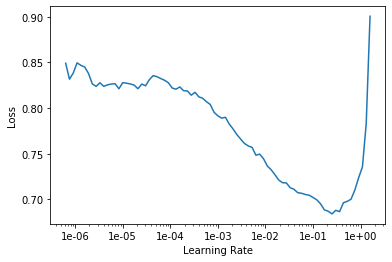

In [68]:
learn.lr_find()
learn.recorder.plot()

In [69]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.597507,0.536456,0.735000,00:19


In [70]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.499599,0.485123,0.767500,00:59
1,0.454256,0.459427,0.800000,00:57


In [80]:
test_preds = [int(learn.predict(x)[1]) for x in test.text.values]

In [86]:
accuracy = (np.array(test_preds) == test.label.values).mean()
print(f'Accuracy on test (Amazon) set is {accuracy:.2f}')

Accuracy on test (Amazon) set is 0.79


# Tasks
### 1. Read and concatenate data into test and train sets.
### 2. Prepare the data for input into your model.

#### 2a: Find the ten most frequent words in the training set.

### 3. Train your model and justify your choices.

### 4. Evaluate your model using metric(s) you see fit and justify your choices.